CIFAR-10 is a data set that consists of several images divided into the following 10 classes
airplanes
cars
birds
cats
deer
dogs
frogs
horses
ships
trucks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

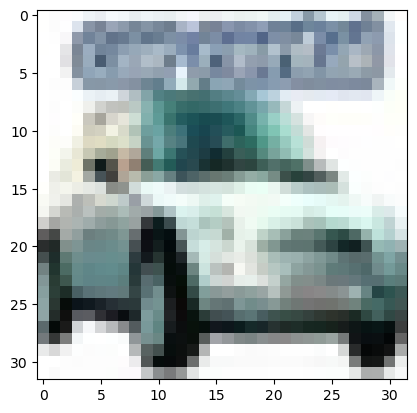

In [38]:
i = 40000
plt.imshow(X_train[i])
# print(y_train[i])

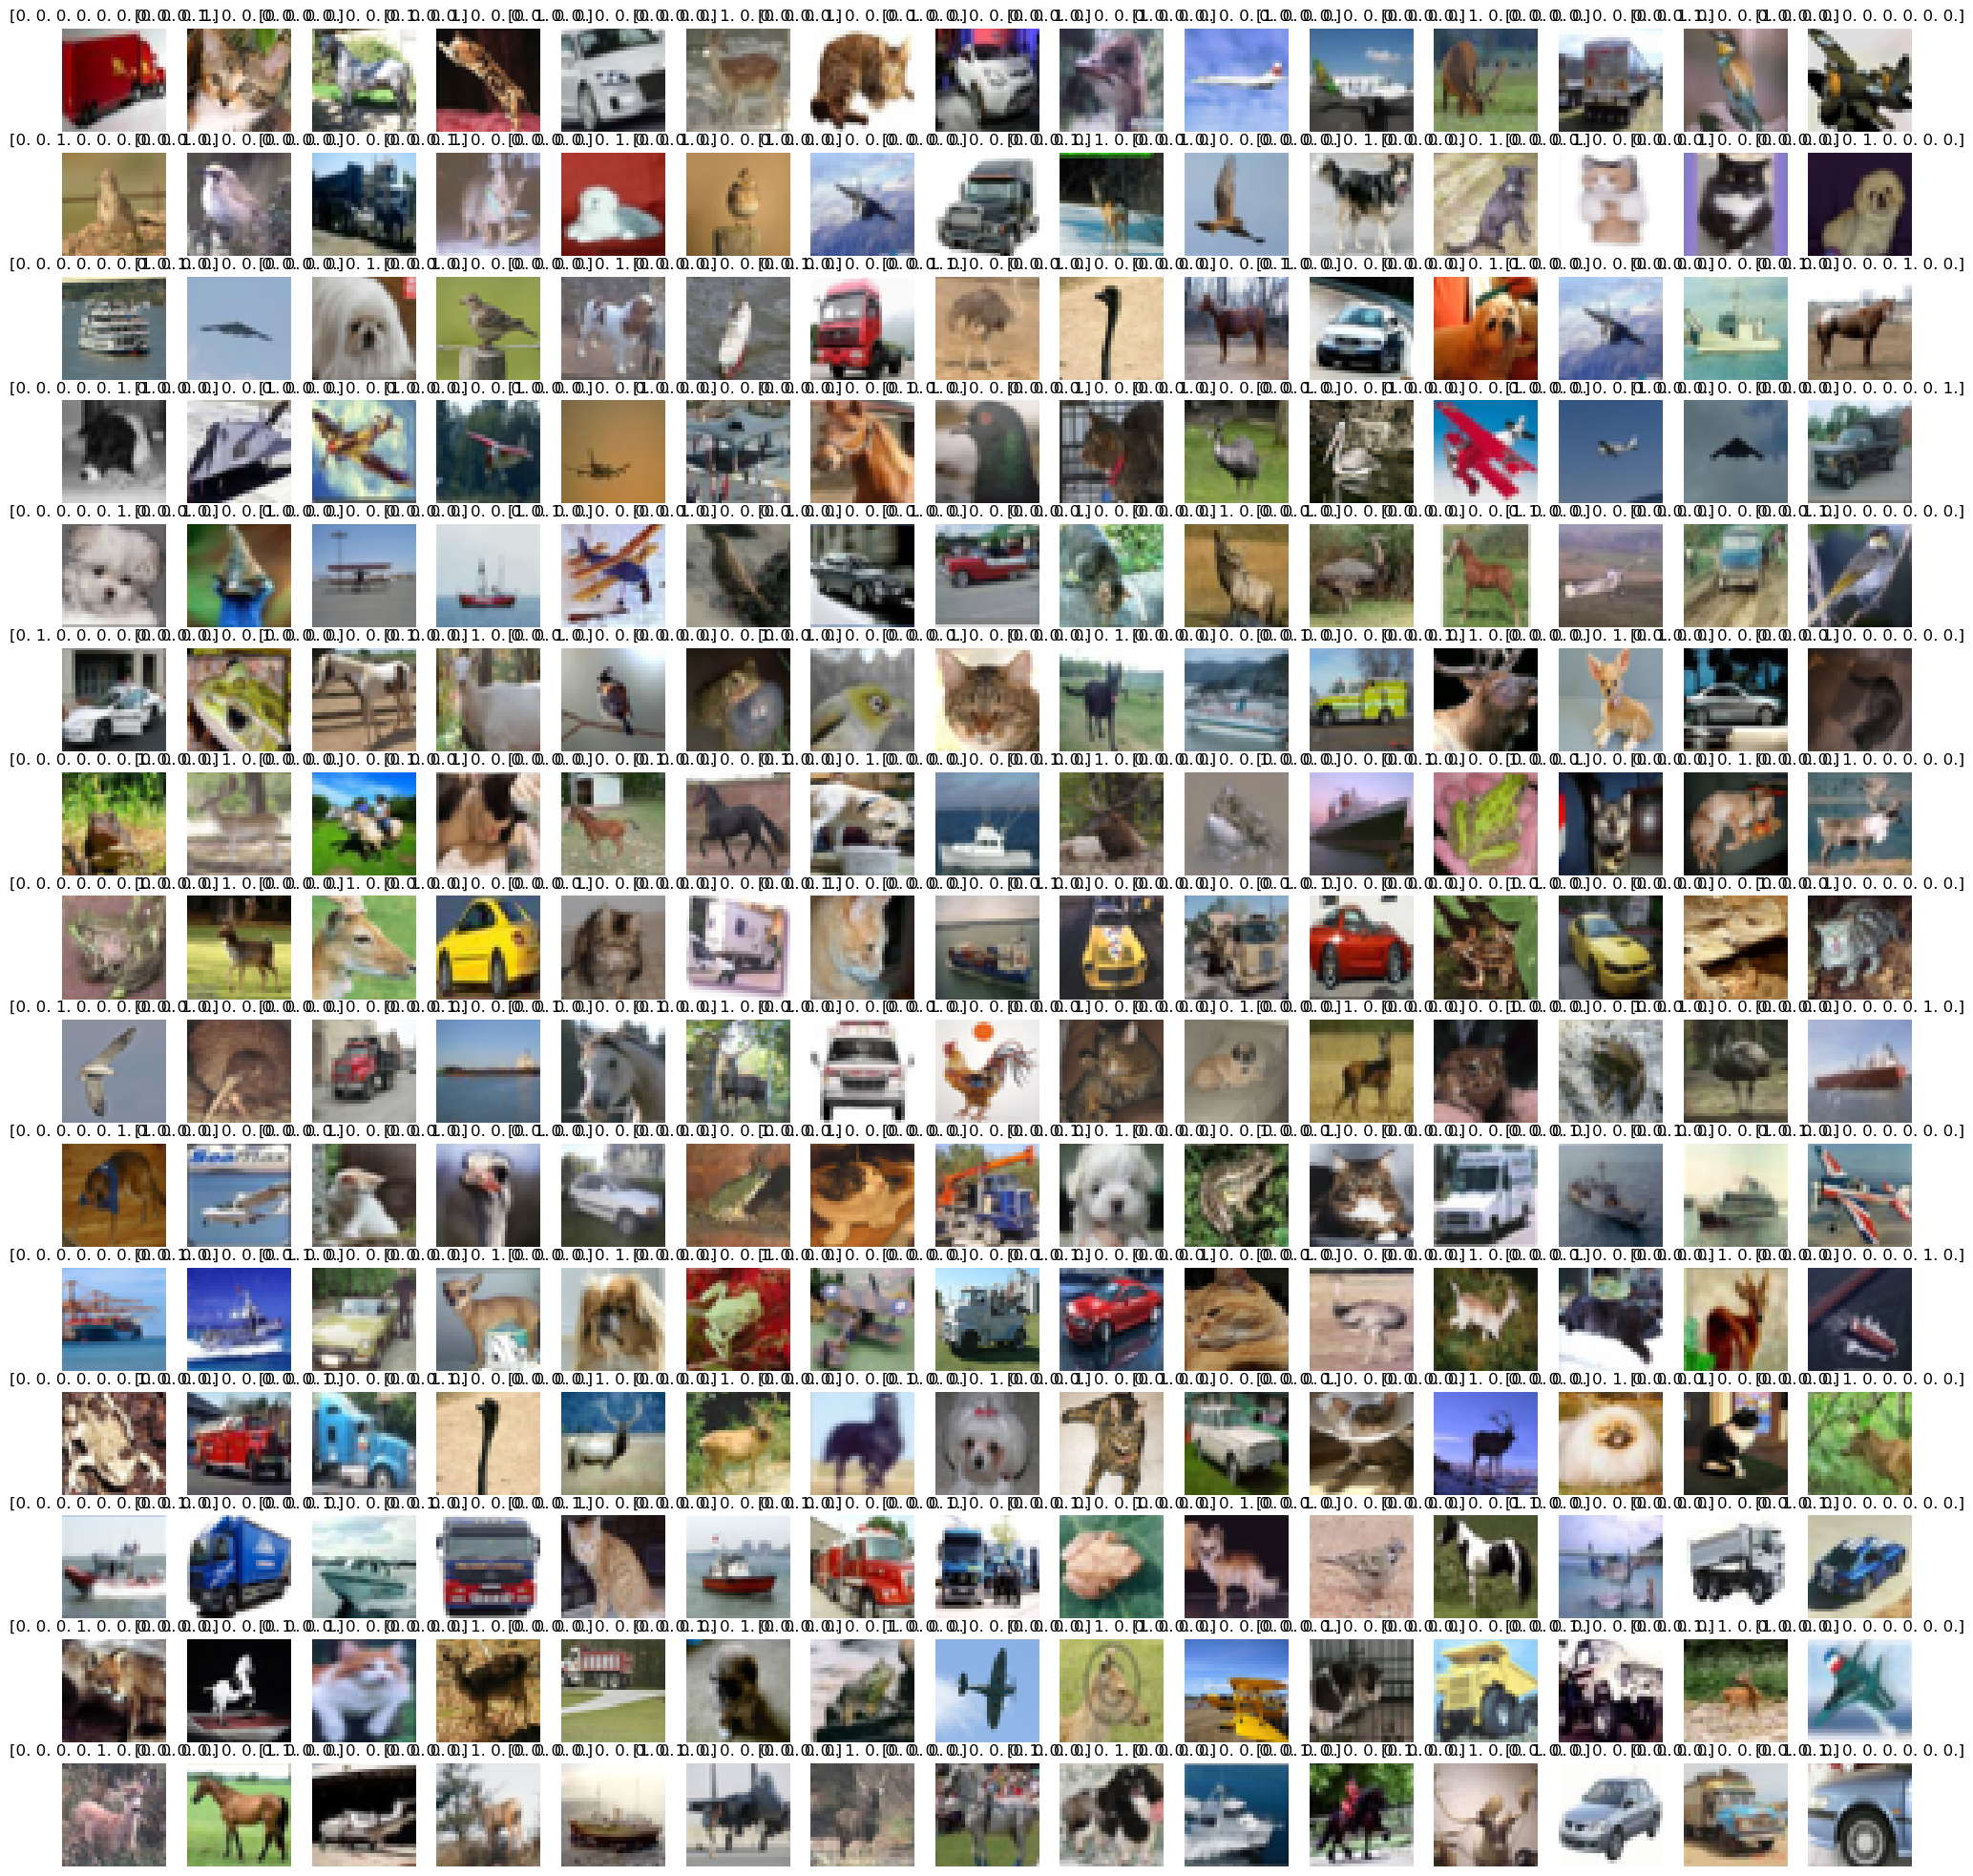

In [37]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) #pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

# plt.subplots_adjust(hspace = 0.4)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
number_cat = 10

In [11]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [12]:
# y_test

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
# X_test

In [15]:
X_train.shape

(50000, 32, 32, 3)

In [16]:
Input_shape = X_train.shape[1:]

In [17]:
Input_shape

(32, 32, 3)

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [31]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

cnn_model = Sequential()
cnn_model.add(Input(shape=Input_shape))  # Use Input layer first
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))


In [20]:
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)


In [21]:
cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True) 
# Go through my training data twice, learning from 32 examples at a time, and shuffle the data each time.

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 76ms/step - accuracy: 0.4297 - loss: 1.5735
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 66ms/step - accuracy: 0.5887 - loss: 1.1693


In [22]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('test accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6344 - loss: 1.0200
test accuracy: 0.6344000101089478


In [23]:
predictions = cnn_model.predict(X_test)  
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


array([3, 8, 8, ..., 5, 4, 7])

In [24]:
# y_test

In [25]:
y_test = y_test.argmax(1)

In [26]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

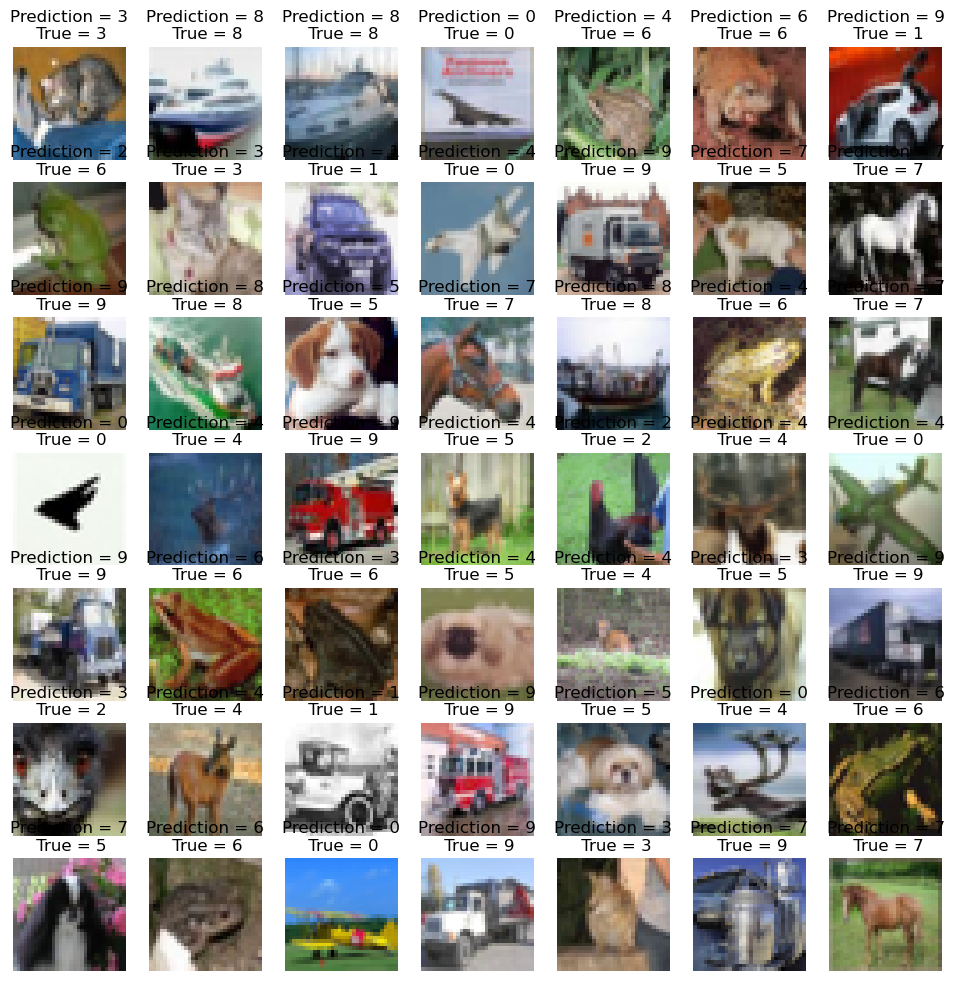

In [39]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
# plt.subplots_adjust(wspace = 1)

In [28]:
from sklearn.metrics  import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [29]:
# import os
# directory = os.path.join(os.getcwd(), 'saved_models')

# if not os.path.isdir(directory):
#     os.makedirs(directory)
# model_path = os.path.join(directory, 'keras_cifar10_trained_model.keras')
# cnn_model.save(model_path)